In [2]:
import numpy as np
from sklearn.cluster import DBSCAN

# Define a function to detect anomalies using DBSCAN
def detect_anomalies_dbscan(data, epsilon, min_samples):
    # Fit the DBSCAN model
    dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
    dbscan.fit(data)

    # Get the labels assigned by DBSCAN
    labels = dbscan.labels_

    # Identify anomalies as data points that are assigned to the -1 cluster label by DBSCAN
    anomalies = data[labels==-1]

    return anomalies

# Generate sample time series data
np.random.seed(123)
data = np.random.normal(0, 1, 1000).cumsum()

# Add some anomalies to the data
data[200:205] = 10
data[800:810] = -8

# Reshape the data to create a 2D array with one column
data = data.reshape(-1, 1)

# Set the DBSCAN hyperparameters
epsilon = 3
min_samples = 10

# Detect anomalies using DBSCAN
anomalies = detect_anomalies_dbscan(data, epsilon, min_samples)

# Print the anomalies
print("Anomalies detected by DBSCAN:")
print(anomalies)


Anomalies detected by DBSCAN:
[]


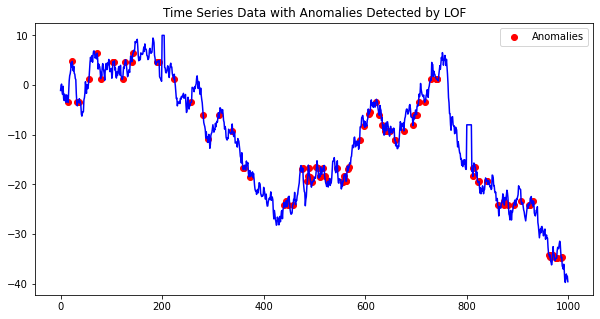

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate sample time series data
np.random.seed(123)
data = np.random.normal(0, 1, 1000).cumsum()

# Add some anomalies to the data
data[200:205] = 10
data[800:810] = -8

# Reshape the data to create a 2D array with one column
data = data.reshape(-1, 1)

# Define the LOF model hyperparameters
num_neighbors = 20
contamination = 0.1

# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=num_neighbors, contamination=contamination)

# Fit the model to the data
lof.fit(data)

# Predict the anomaly scores for the data points
anomaly_scores = -lof.negative_outlier_factor_

# Determine the threshold for anomaly detection
anomaly_threshold = np.percentile(anomaly_scores, 100 * contamination)

# Identify the anomalies
anomalies = data[anomaly_scores < anomaly_threshold]

# Plot the time series data and anomalies
plt.figure(figsize=(10, 5))
plt.plot(data, color='blue')
plt.scatter(np.where(anomaly_scores < anomaly_threshold), anomalies, color='red', label='Anomalies')
plt.legend()
plt.title('Time Series Data with Anomalies Detected by LOF')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from sklearn.neighbors import LocalOutlierFactor

# Load sample time series data from CSV file
data = pd.read_csv('time_series_data.csv')
data = data['value'].values.reshape(-1, 1)

# Define the LOF model hyperparameters
num_neighbors = 20
contamination = 0.1

# Create the LOF model
lof = LocalOutlierFactor(n_neighbors=num_neighbors, contamination=contamination)

# Fit the model to the data
lof.fit(data)

# Predict the anomaly scores for the data points
anomaly_scores = -lof.negative_outlier_factor_

# Determine the threshold for anomaly detection
anomaly_threshold = np.percentile(anomaly_scores, 100 * contamination)

# Identify the anomalies
anomalies = data[anomaly_scores < anomaly_threshold]
anomaly_indices = np.where(anomaly_scores < anomaly_threshold)[0]

# Create a Plotly figure with the time series data and anomalies
fig = go.Figure()

# Add the time series data to the figure
fig.add_trace(
    go.Scatter(x=np.arange(len(data)), y=data.flatten(), mode='lines', name='Time Series Data')
)

# Add the anomalies to the figure
fig.add_trace(
    go.Scatter(x=anomaly_indices, y=anomalies.flatten(), mode='markers', name='Anomalies', marker=dict(color='red'))
)

# Set the figure layout
fig.update_layout(
    title='Time Series Data with Anomalies Detected by LOF',
    xaxis_title='Time',
    yaxis_title='Value',
)

# Show the figure
fig.show()


In [ ]:
import numpy as np
from sklearn.cluster import KMeans

# Define a function to detect anomalies using K-Means clustering
def detect_anomalies_kmeans(data, num_clusters):
    # Fit the K-Means clustering model
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(data)

    # Get the cluster labels assigned by K-Means
    labels = kmeans.labels_

    # Calculate the distances of each data point from its nearest centroid
    distances = np.min(kmeans.transform(data), axis=1)

    # Identify anomalies as data points that are farthest from their nearest centroid
    anomalies = data[np.argsort(distances)[-num_clusters:]]

    return anomalies

# Generate sample time series data
np.random.seed(123)
data = np.random.normal(0, 1, 1000).cumsum()

# Add some anomalies to the data
data[200:205] = 10
data[800:810] = -8

# Reshape the data to create a 2D array with one column
data = data.reshape(-1, 1)

# Set the K-Means hyperparameters
num_clusters = 3

# Detect anomalies using K-Means clustering
anomalies = detect_anomalies_kmeans(data, num_clusters)

# Print the anomalies
print("Anomalies detected by K-Means clustering:")
print(anomalies)
